# Resumo
Este projeto tem como objetivo fazer uma análise exploratória completa dos dados de um dataset(extraído do kaggle) de uma loja virtual **fictícia**, com o intuito de saber qual sistema operacional é mais utilizado pelos clientes, qual o que gera mais lucros, entre outras coisas.

**Este ipynb contém mais recursos de programação que os outros por conta que este dataset contem mais de uma informação em suas variáveis**

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Comercio.csv')
df.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73


# Traduzindo colunas

In [10]:
df.columns = ['endereco', 'lote', 'turno', 'browser', 'companhia', 'cartao de credito',
       'validade do cartao', 'codigo do cartao', 'bandeira do cartao', 'email', 'cargo',
       'ip', 'lingua', 'valor da compra']
df.head()

,endereco,lote,turno,browser,companhia,cartao de credito,validade do cartao,codigo do cartao,bandeira do cartao,email,cargo,ip,lingua,valor da compra
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


#Informações adicionais

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   endereco            10000 non-null  object 
 1   lote                10000 non-null  object 
 2   turno               10000 non-null  object 
 3   browser             10000 non-null  object 
 4   companhia           10000 non-null  object 
 5   cartao de credito   10000 non-null  int64  
 6   validade do cartao  10000 non-null  object 
 7   codigo do cartao    10000 non-null  int64  
 8   bandeira do cartao  10000 non-null  object 
 9   email               10000 non-null  object 
 10  cargo               10000 non-null  object 
 11  ip                  10000 non-null  object 
 12  lingua              10000 non-null  object 
 13  valor da compra     10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


# Verificando dados nulos

In [12]:
df.isnull().sum()

endereco              0
lote                  0
turno                 0
browser               0
companhia             0
cartao de credito     0
validade do cartao    0
codigo do cartao      0
bandeira do cartao    0
email                 0
cargo                 0
ip                    0
lingua                0
valor da compra       0
dtype: int64

***
# Engenharia de recursos
Esse tópico terá como intuito extrair informações importantes das colunas "browser", "cargo", "bandeira do cartao" e "email", como por exemplo o sistema operacional usado, o proprio browser independente da versão, cargos mais comuns, bandeira do cartão filtrada e tambem o provedor de email
### Coletando navegadores

In [13]:
def filtraBrowser(x):
  if "Opera" in x:
    return "Opera"
  
  elif "Mozilla" in x:
    return "Mozilla"
  
  else:
    return "Outros"
    
browsers = df['browser'].apply(lambda x:filtraBrowser(x))

### Coletando sistema operacional

In [14]:
def filtraSO(x):
  if "Linux" in x:
    return "Linux"
  
  elif "Windows" in x:
    return "Windows"
  
  elif "Mac" in x:
    return "Mac"

  else:
    return "Outros"
    
SO = df['browser'].apply(lambda x:filtraSO(x))

### Coletando bandeira do cartão

In [15]:
def filtraBandeira(x):
  if "JCB" in x:
    return "JCB"
  
  elif "VISA" in x:
    return "VISA"
  
  elif "Mastercard" in x:
    return "MASTERCARD"
  
  elif "American Express" in x:
    return "AM_EXPRESS"
  
  else:
    return "Outros"
    
bandeira = df['bandeira do cartao'].apply(lambda x:filtraBandeira(x))
bandeira

0              JCB
1       MASTERCARD
2              JCB
3           Outros
4           Outros
           ...    
9995           JCB
9996           JCB
9997          VISA
9998    AM_EXPRESS
9999           JCB
Name: bandeira do cartao, Length: 10000, dtype: object

### Coletando provedores de email
Para isso, verificamos os emails mais utilizados

In [16]:
df['email'].apply(lambda x:x.split("@")[1]).value_counts()

hotmail.com           1638
yahoo.com             1616
gmail.com             1605
smith.com               42
williams.com            37
                      ... 
george.biz               1
perry.net                1
henson-davis.com         1
townsend-reed.info       1
chavez.biz               1
Name: email, Length: 3416, dtype: int64

### Coletando os emails mais utilizados

In [17]:
def filtraEmail(x):
  if "yahoo" in x:
    return "yahoo"
  
  elif "hotmail" in x:
    return "hotmail"
  
  elif "gmail" in x:
    return "gmail"

  else:
    return "Outros"

provedores = df['email'].apply(lambda x:x.split("@")[1])
provedores = provedores.apply(lambda x:x.split(".")[0])
provedores = provedores.apply(lambda x:filtraEmail(x))

# Adicionando as novas informaçoes no dataframe

In [18]:
df["browser"] = browsers
df["sistema operacional"] = SO
df["email"] = provedores
df["bandeira do cartao"] = bandeira

# Excluindo informações desnecessárias para a análise

In [19]:
df.drop(["endereco","companhia","cartao de credito","codigo do cartao","ip",'cargo','lote'], axis=1, inplace=True)

***
# **Visualizando modificações do dataframe** 

In [21]:
df.head()

,turno,browser,validade do cartao,bandeira do cartao,email,lingua,valor da compra,sistema operacional
0,PM,Opera,02/20,JCB,yahoo,el,98.14,Linux
1,PM,Opera,11/18,MASTERCARD,Outros,fr,70.73,Windows
2,PM,Mozilla,08/19,JCB,Outros,de,0.95,Windows
3,PM,Mozilla,02/24,Outros,Outros,es,78.04,Mac
4,AM,Opera,10/25,Outros,gmail,es,77.82,Linux


***
# **Visualizando dados**
Visualizando compras por turno

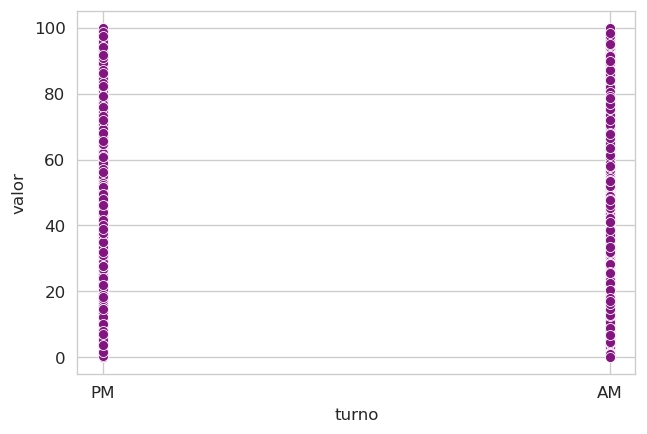

In [30]:
sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set_palette("BuPu_r")
plt.ylabel("valor")
sns.scatterplot(y="valor da compra", x="turno", data=df)
plt.show()

Obs: Há um equilibrio de quantidade de compras realizadas por turno
***

## Visualizando quantidade de compras por bandeira do cartão

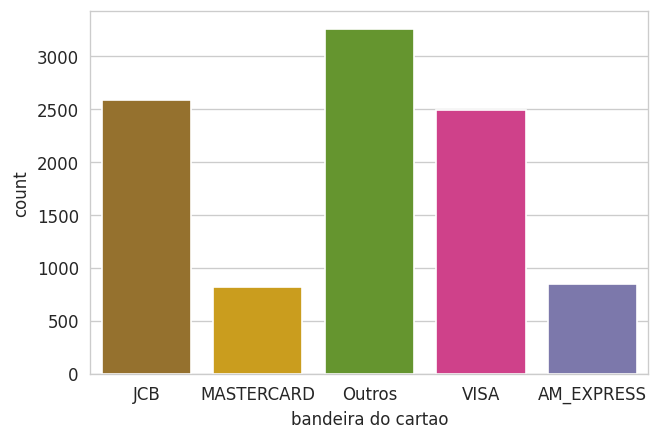

In [365]:
plt.figure(dpi=120)
sns.set_palette("Dark2_r")
plt.ylabel("valor")
sns.countplot(x="bandeira do cartao", data=df)
plt.show()

Obs: As banddeiras mais variadas juntas são responsáveis pela grande maioria das compras realizadas
***

## Sistemas operacionais mais usados

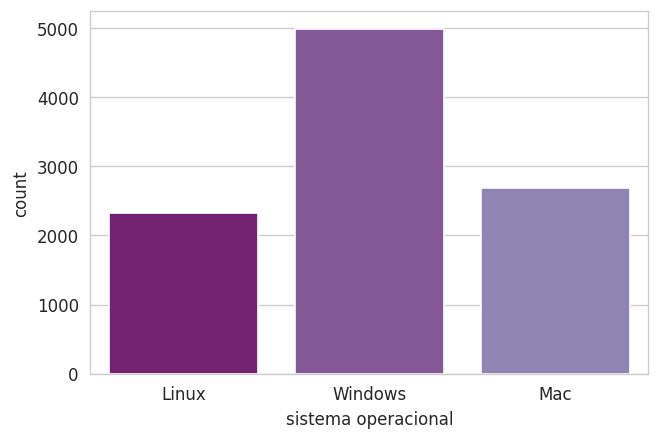

In [366]:
plt.figure(dpi=120)
sns.set_palette("BuPu_r")
plt.ylabel("quantidade")
sns.countplot(x="sistema operacional",data=df)
plt.show()

***

## Browser mais utilizado

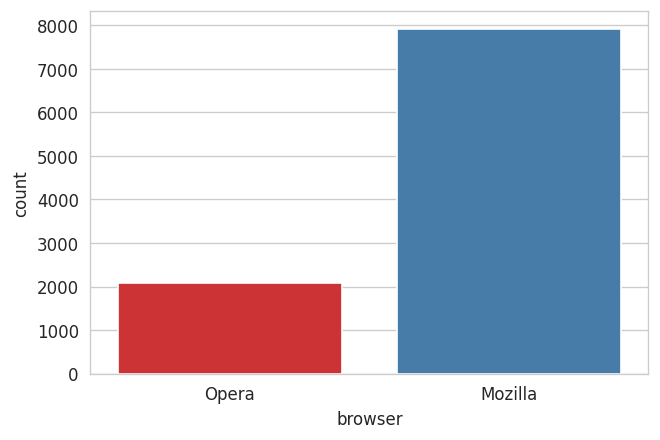

In [367]:
plt.figure(dpi=120)
sns.set_palette("Set1")
plt.ylabel("quantidade")
sns.countplot(x="browser",data=df)
plt.show()

***
# Agrupamentos
## Agrupando media de compras realizadas por browser

In [368]:
df[["valor da compra","browser"]].groupby("browser").mean()

,valor da compra
browser,
Mozilla,50.194543
Opera,50.930376


Obs: É notavel que, por mais que o mozilla tenha a maior quantidade de compras realizadas, as compras pelo opera sao mais caras ao ponto de se igualar as do mozilla.
***

## Agrupando media de compras realizadas por sistema operacional

In [369]:
df[["valor da compra","sistema operacional"]].groupby("sistema operacional").mean()

,valor da compra
sistema operacional,
Linux,50.852898
Mac,49.159955
Windows,50.750354


Obs: Também é notável que por mais que o windows ganhe disparado em quantidade de clientes, o linux contém usuários que fazem compras mais robustas
***

## Agrupando media de compras realizadas por turno

In [370]:
df[["valor da compra","turno"]].groupby("turno").mean()

,valor da compra
turno,
AM,50.186511
PM,50.503779


***
## Agrupando media de compras realizadas por email

In [371]:
df[["valor da compra","email"]].groupby("email").mean()

,valor da compra
email,
Outros,50.267607
gmail,49.269371
hotmail,51.165995
yahoo,50.841590


***
## Agrupando media de compras realizadas por bandeira 

In [372]:
df[["valor da compra",'bandeira do cartao']].groupby("bandeira do cartao").mean()

,valor da compra
bandeira do cartao,
AM_EXPRESS,50.489423
JCB,49.912512
MASTERCARD,50.043015
Outros,50.718954
VISA,50.363323


***
# Conclusão
### Windows é o mais utilizado, mas não tem o melhor historico de lucros, ambos os sistemas possuem um equilibrio em seus dados o suficiente para nao optar por um especifico